In [1]:
import os
WM_PROJECT_USER_DIR=os.environ['WM_PROJECT_USER_DIR']
import sys 
sys.path.append(f"{WM_PROJECT_USER_DIR}/utilities")
import numpy as np
import pandas as pd
import postProcess.polyMesh2d as mesh2d
import postProcess.pyResconstruct as pyResconstruct
import postProcess.pyFigure as pyFigure
import postProcess.pyCompute as pyCompute
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
import json
import proplot as plot
import concurrent.futures

data_folder=os.path.abspath('../postProcess')
save_folder=os.path.abspath('../postProcess/images')
transverse_data_folder=os.path.abspath("../postProcess/transverseAveragedData/")

%load_ext autoreload
%autoreload 2


## Case Setting

In [1]:
Pe=0.5
pixelResolution=0.5e-6
DO2=7.63596e-6
w = 30e-6
U_0   = Pe*DO2/w
rhof =4.4890
rhoST= 1.2758
print(f"average inlet velocity: {U_0} m/s")
print(f"air flux: {U_0*60} m3/(m2 min) ")
print(f"air flux at ST: {U_0*60*rhof/rhoST} m3 (ST)/(m2 min) ")
print(f"air flux at ST: {U_0*60*60*rhof/rhoST} m3 (ST)/(m2 h) ")

print("---- air flux reference----")
print(f"reference air flux of CT experiments in LiuDong paper:0.24~1.90 m3/(m2 min)  ")
print(f"recommended min flux by Burger (Moore, 1999): 0.005~0.0133 m3 (ST)/(m2.min)")
print(f"usual air flux of CT expermients (Moore, 1999) : 0.486 m3 (ST)/(m2.min)")
print(f"Lloydminster type heavy oil min air flux (Moore, 1999): 0.0468 m3 (ST)/(m2.min) [(450 m3(ST)/m3), cf rate: 0.15m/d] ")
print(f"relatively light oil min air flux (Moore, 1999): 0.0156 m3 (ST)/(m2.min) [(150 m3(ST)/m3), cf rate: 0.15m/d] ")

print("---- combustion front velocity----")
print("reference cf rate (Moore, 1999): 0.15 m/d=> 1.73 um/s => pass 680um need about 386s")


average inlet velocity: 0.127266 m/s
air flux: 7.635959999999999 m3/(m2 min) 
air flux at ST: 26.86771001724408 m3 (ST)/(m2 min) 
air flux at ST: 1612.0626010346446 m3 (ST)/(m2 h) 
---- air flux reference----
reference air flux of CT experiments in LiuDong paper:0.24~1.90 m3/(m2 min)  
recommended min flux by Burger (Moore, 1999): 0.005~0.0133 m3 (ST)/(m2.min)
usual air flux of CT expermients (Moore, 1999) : 0.486 m3 (ST)/(m2.min)
Lloydminster type heavy oil min air flux (Moore, 1999): 0.0468 m3 (ST)/(m2.min) [(450 m3(ST)/m3), cf rate: 0.15m/d] 
relatively light oil min air flux (Moore, 1999): 0.0156 m3 (ST)/(m2.min) [(150 m3(ST)/m3), cf rate: 0.15m/d] 
---- combustion front velocity----
reference cf rate (Moore, 1999): 0.15 m/d=> 1.73 um/s => pass 680um need about 386s


### Comments
air flux is significantly larger than the normal CT experiments and reserver condition 

## Min/Max fields

In [5]:
file_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe5e-1/postProcessing/minMaxComponents2/0.31/fieldMinMax.dat"
Ufile_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T773_Pe5e-1/postProcessing/minMaxMagnitude/0.31/fieldMinMax.dat"
sampling_rate=1

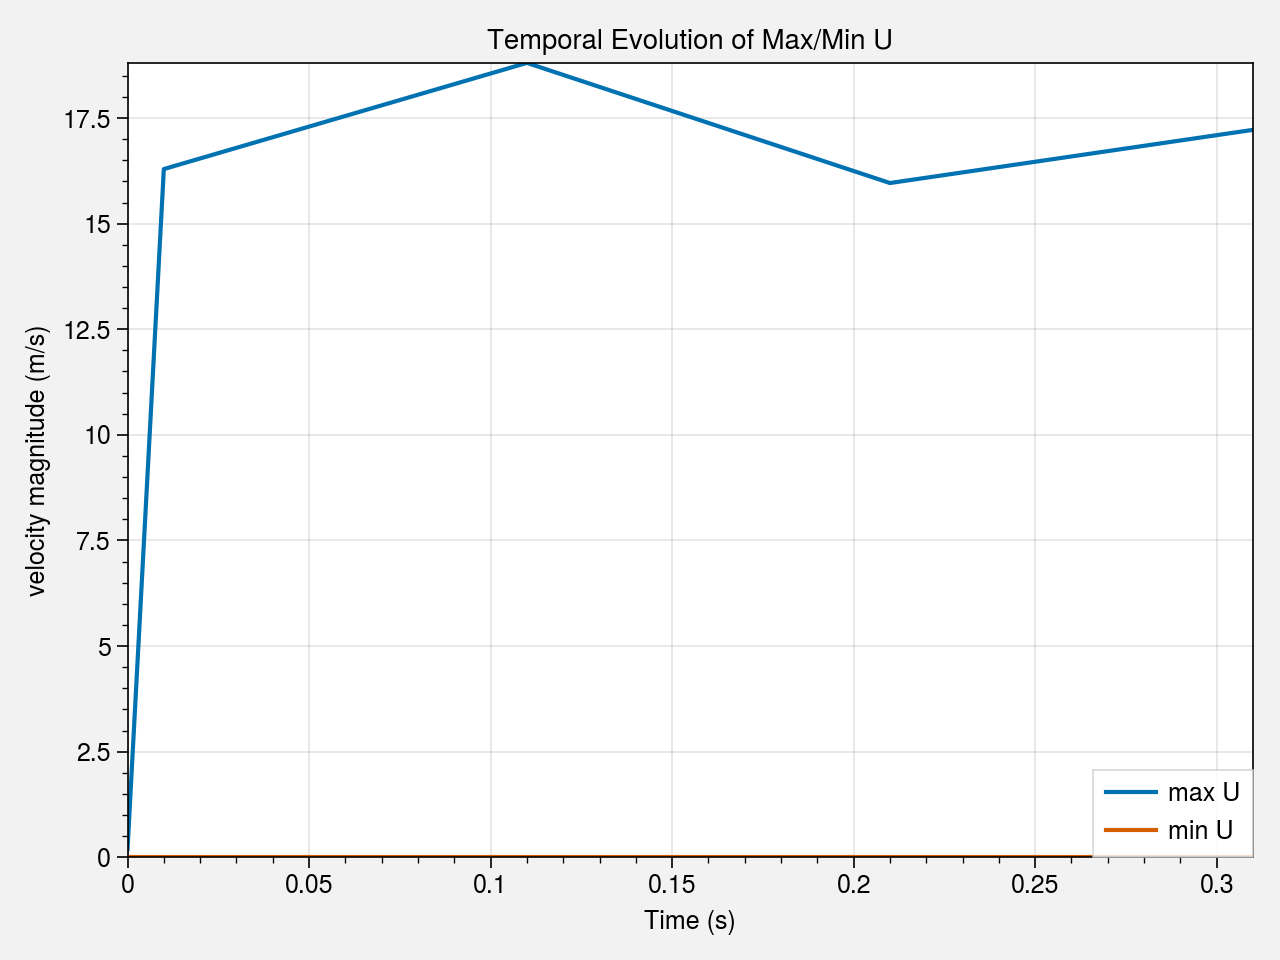

In [6]:
fig,ax,_=pyFigure.plot_min_max_field(Ufile_path,sampling_rate,"U","velocity magnitude (m/s)")

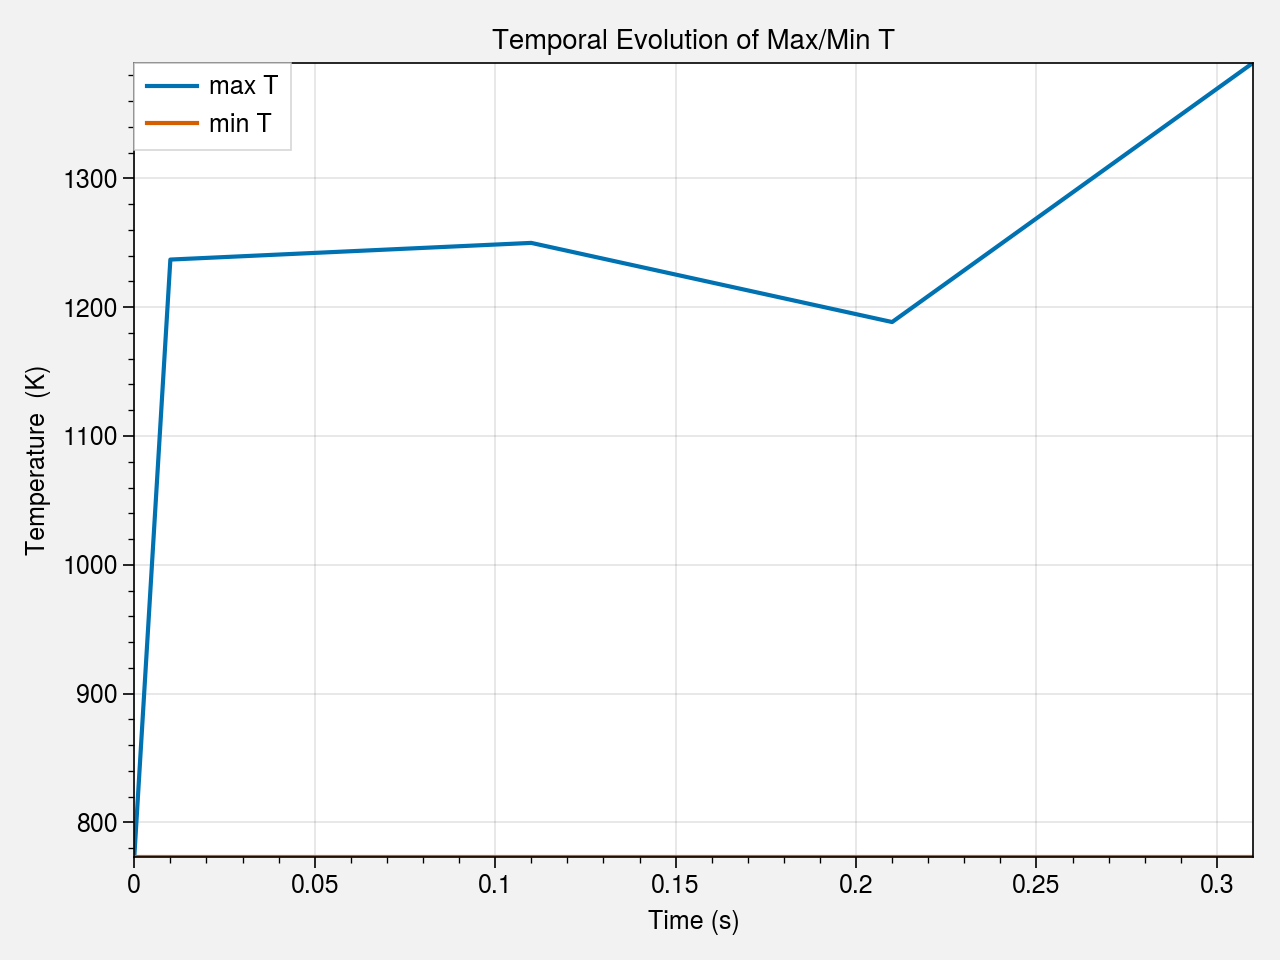

In [7]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"T","Temperature  (K)")

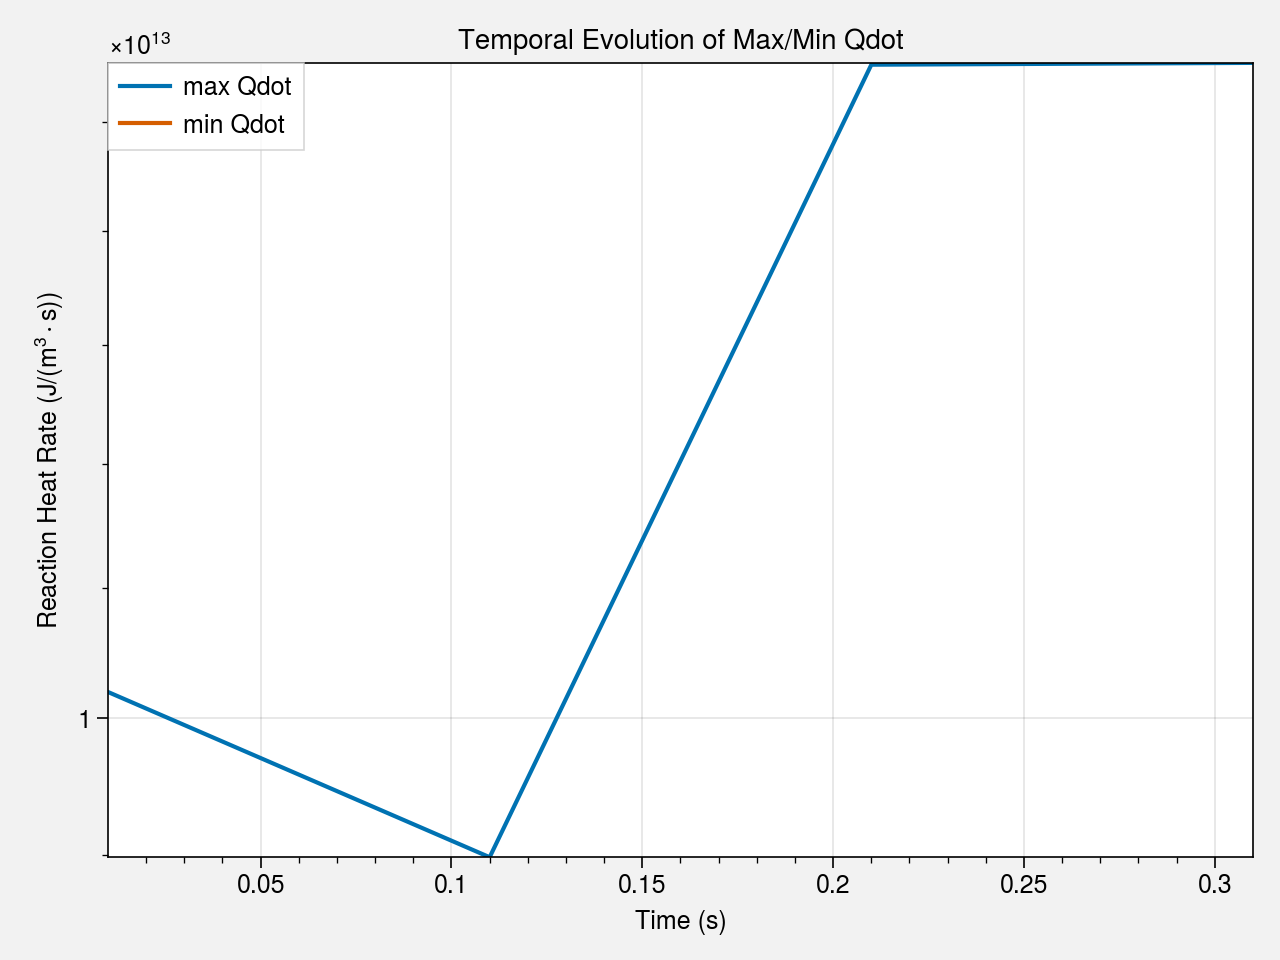

In [8]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"Qdot","Reaction Heat Rate (J/(m$^3\cdot$s))","log")
# ax.set_xlim([0.1,8.2])
# ax.set_ylim([1e10,2e11])

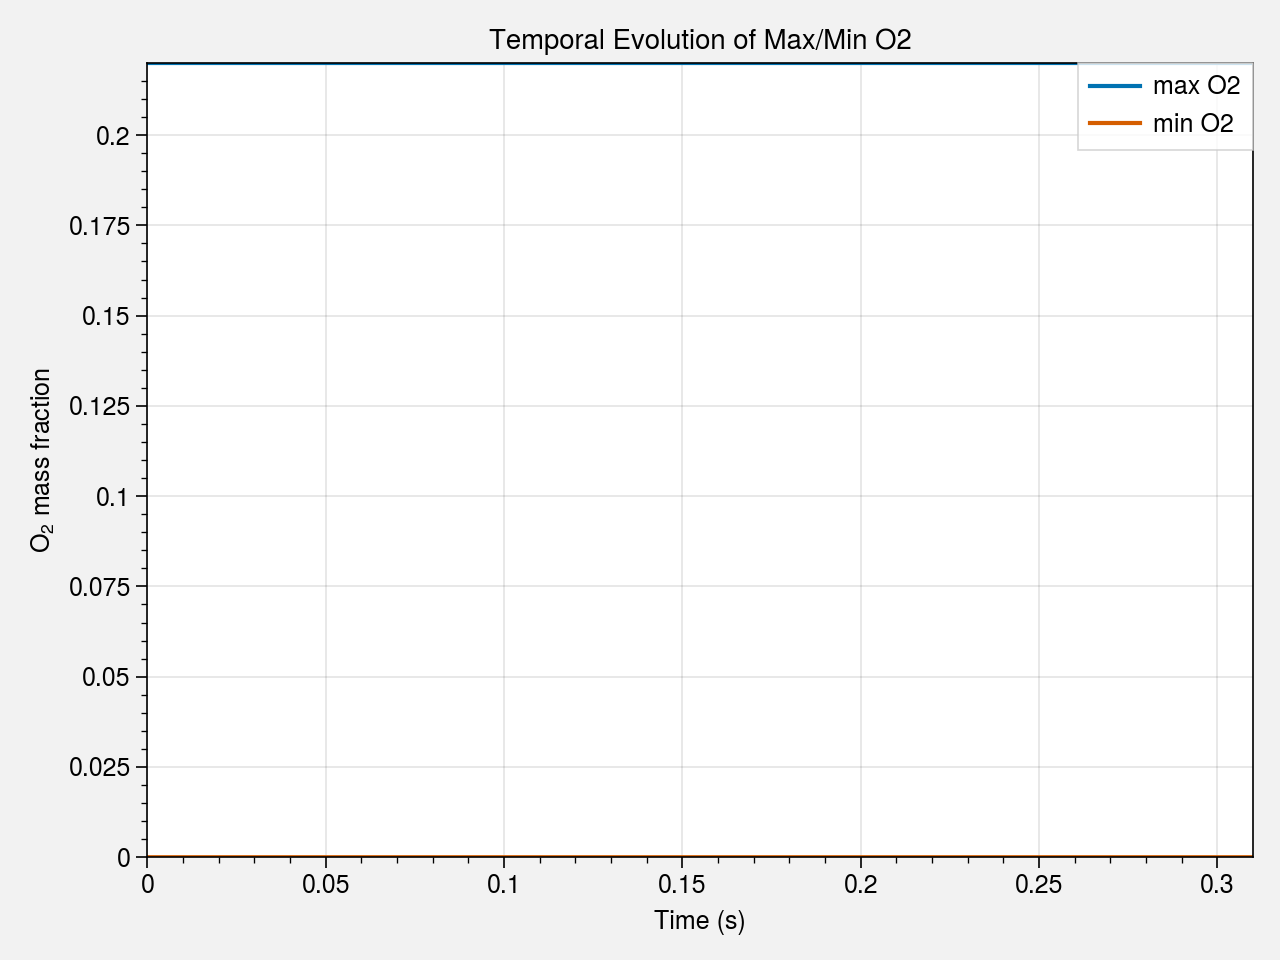

In [9]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"O2","O$_2$ mass fraction")

## Trasversly averaged fields

In [10]:
pyFigure.get_times_from_data_folder(transverse_data_folder)

array(['0.01', '0.11', '0.21', '0.31'], dtype='<U4')

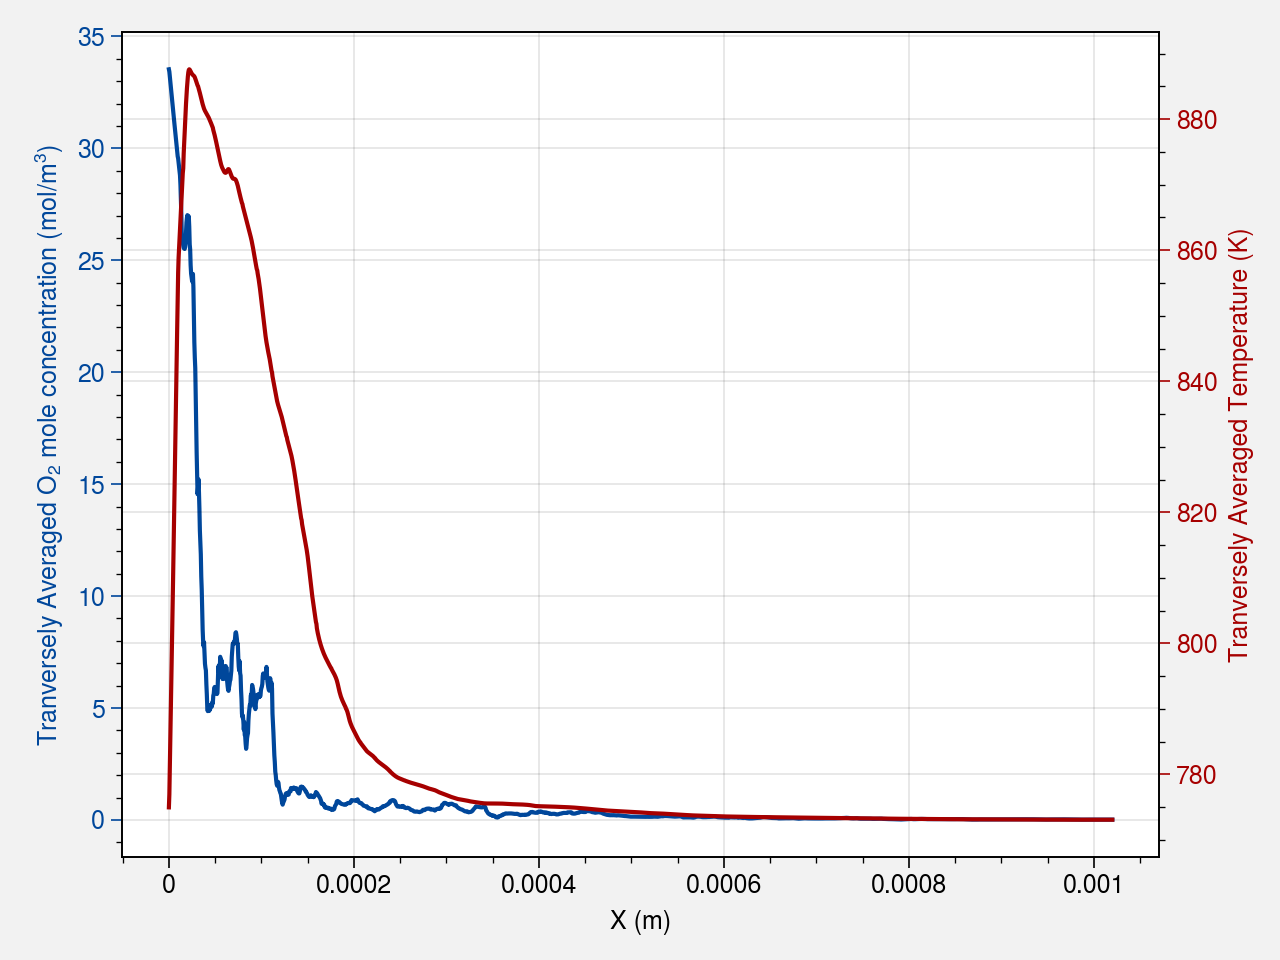

In [12]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"0.01")

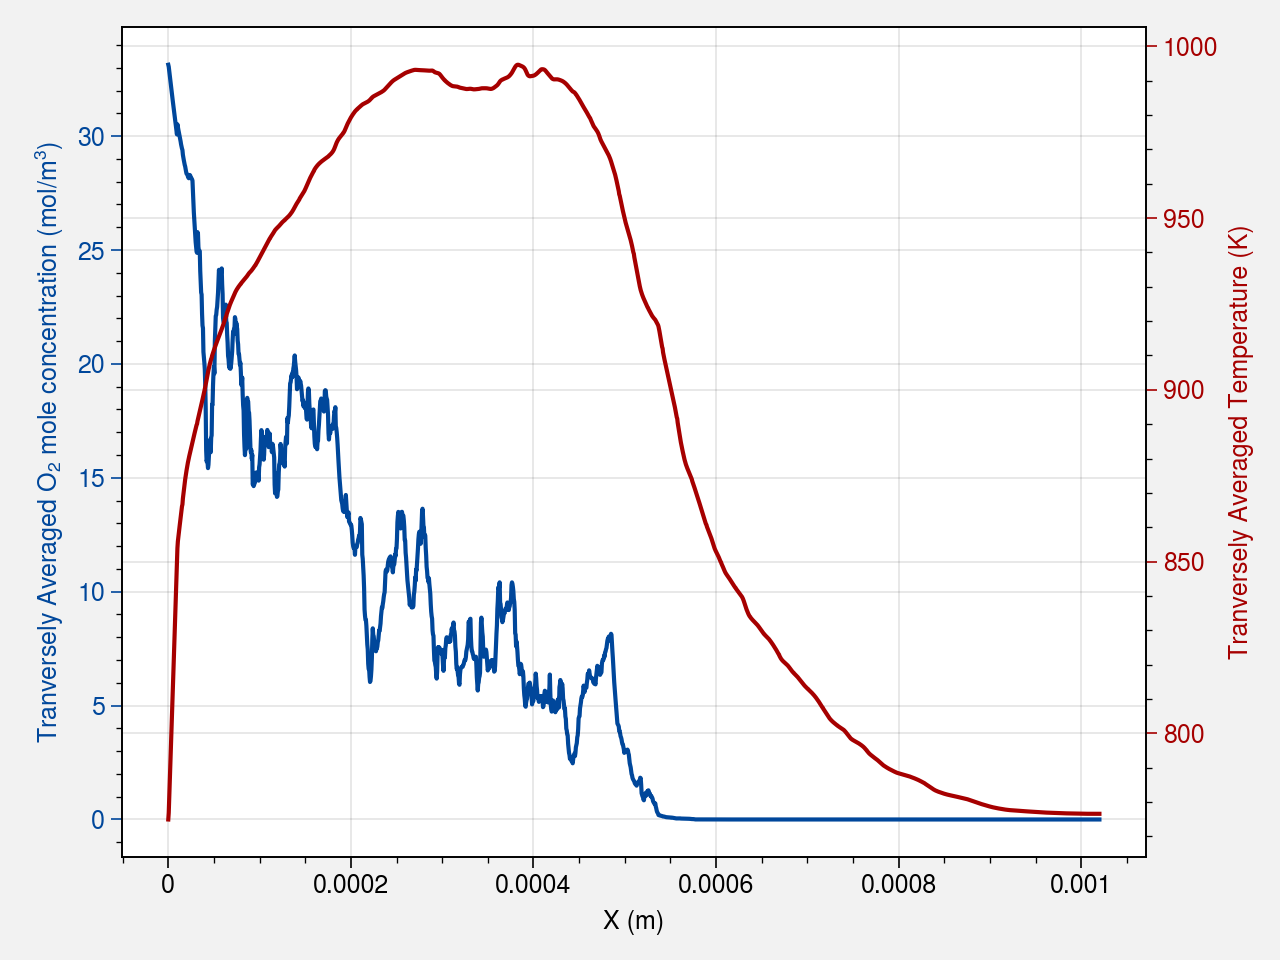

In [13]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"0.11")

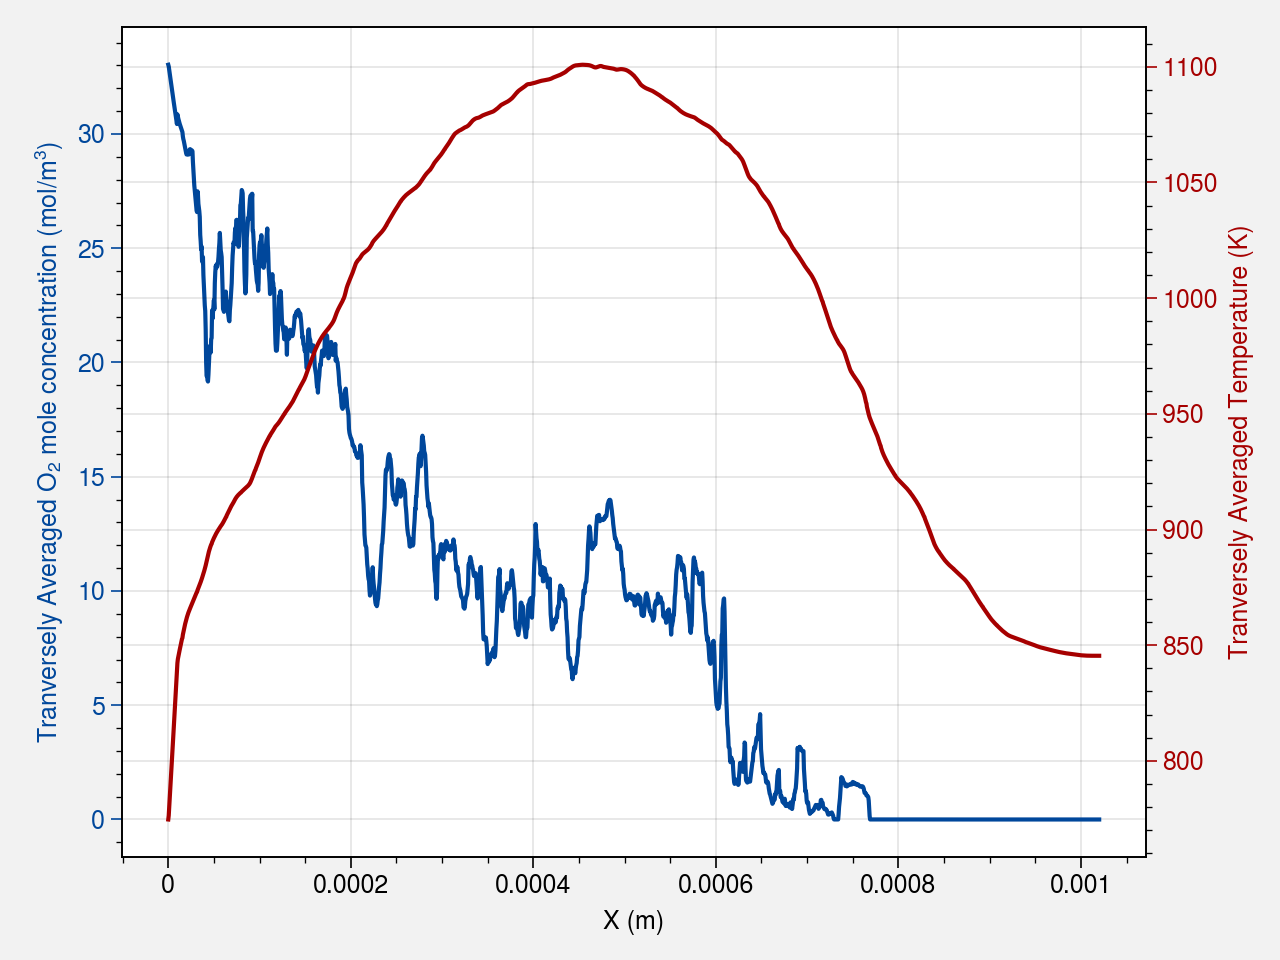

In [14]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"0.21")

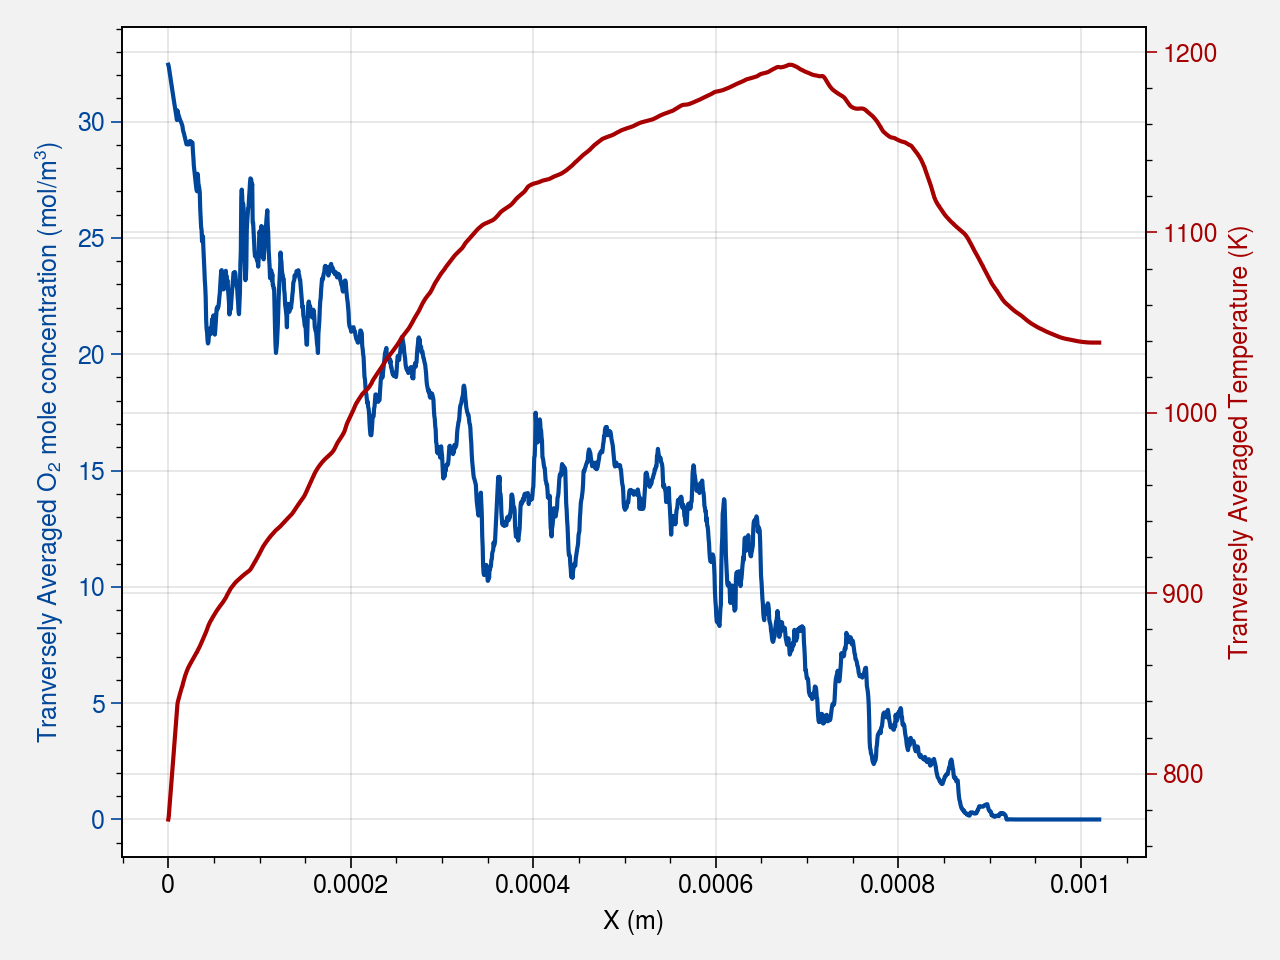

In [15]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"0.31")

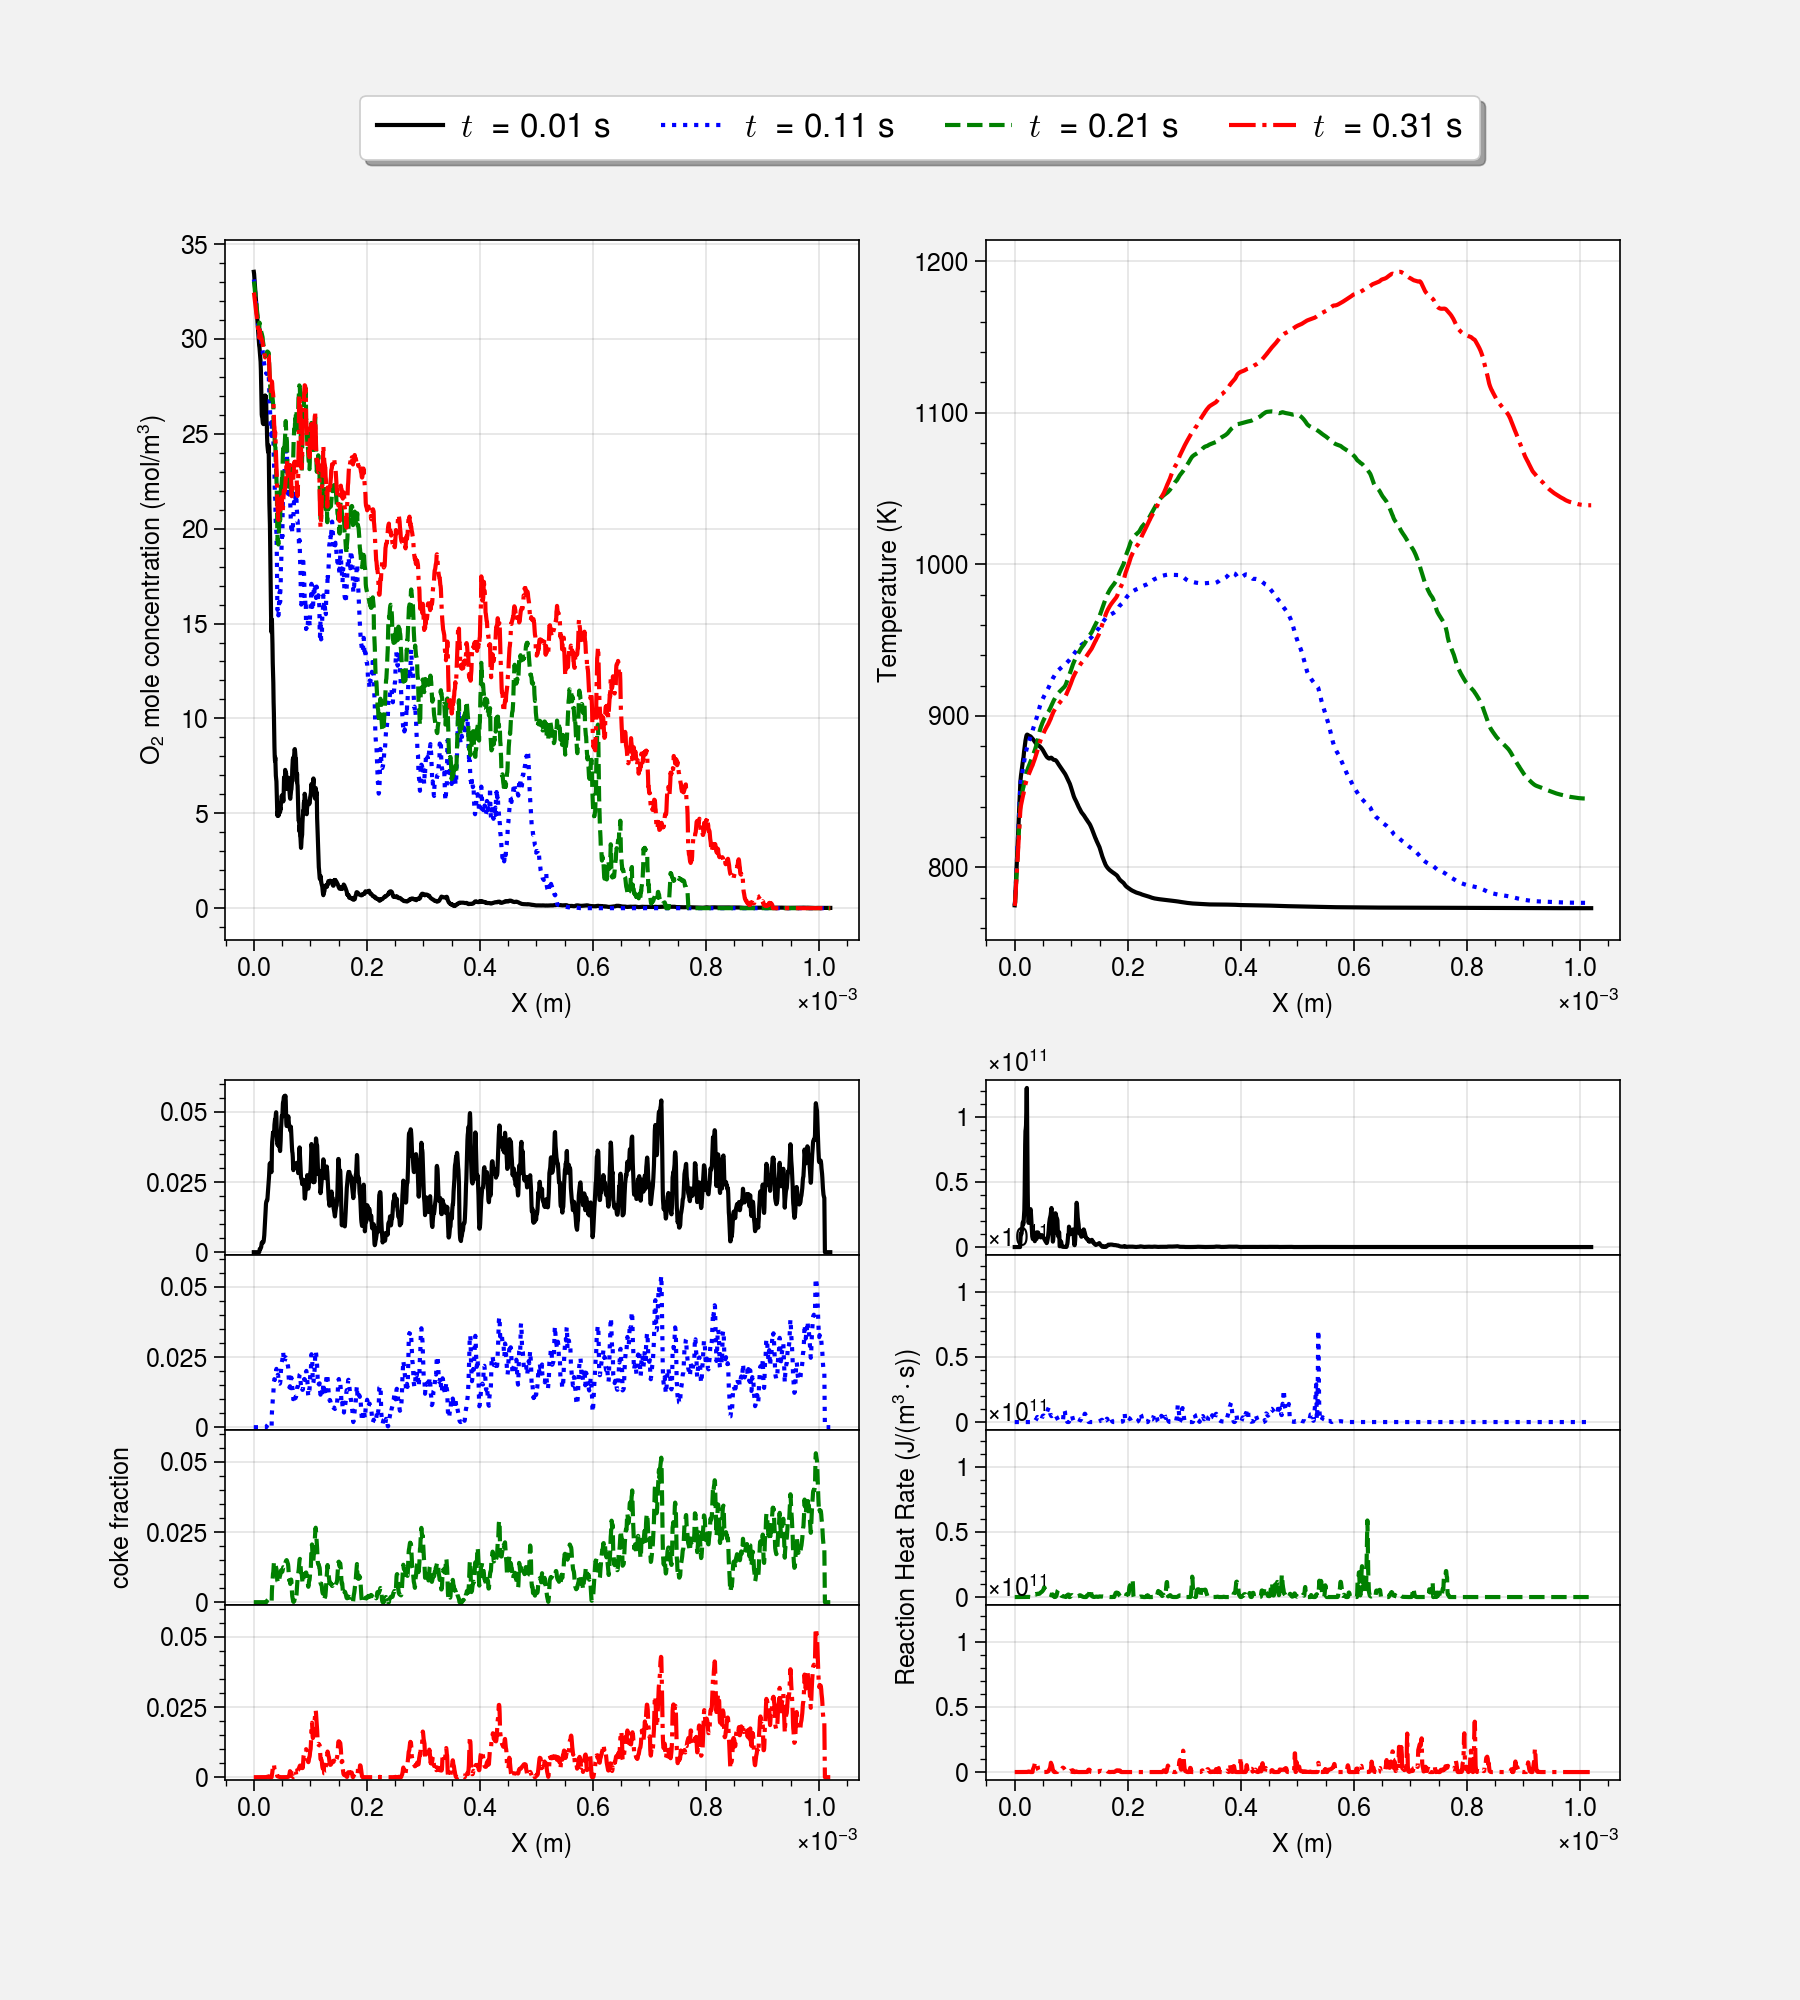

In [16]:
times=["0.01","0.11","0.21","0.31"]
fig=pyFigure.plot_transverse_averages_of_multiple_times(transverse_data_folder,times)


### comments
1. the combustion width increased with the Pe due to the reactive fingering. At the time of 0.31, the combustion front almost expand to all the domain 
2. Unlike the advection-limited regime with the Pe of 1e-2， the combustion front did not move like a piston pattern, with some locally rich coke remained at the inlet when the combustion front almost break through the domain 
3. The combustion temperature keep increasing 

In [16]:
fig.savefig("transverselyAveragesOfMultipleTimeInstants.jpg",bbox_inches='tight')

## Show the reaction rate and burning rate

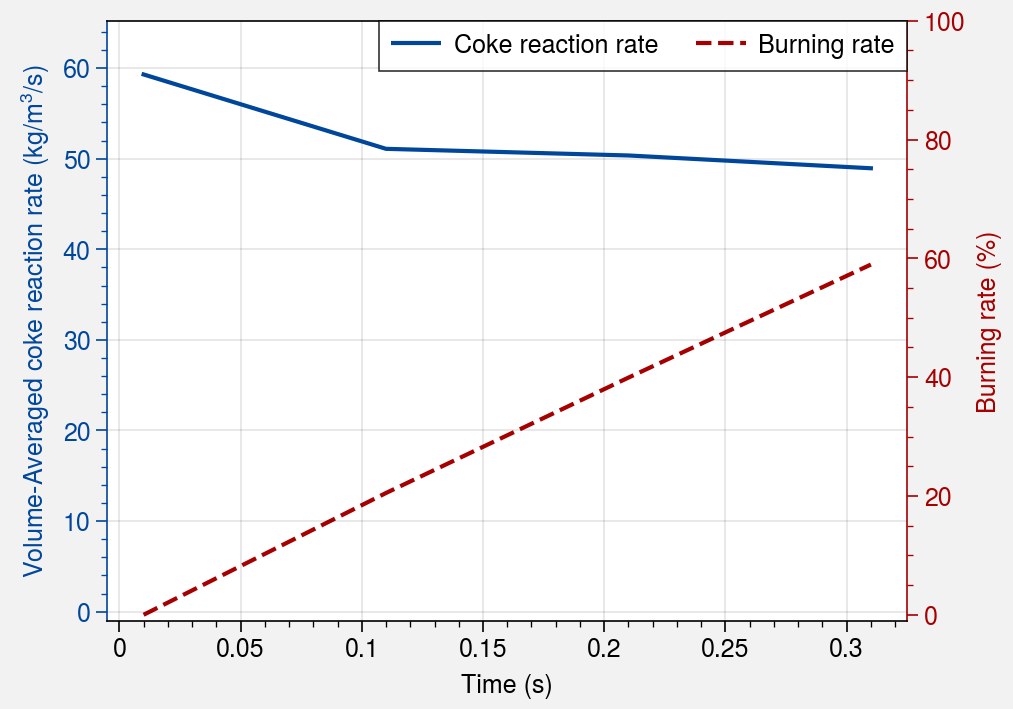

In [17]:
df_rate=pd.read_csv("../postProcess/others/ReactionRateAndBurningRate.csv")
ax1,ax2,fig=pyFigure.plot_reaction_rate_burning_rate(df_rate)

In [18]:
fig.savefig("ReactionRateAndBurningRate.jpg",bbox_inches='tight')

## Show O2 flux and reaction rate

In [19]:

df_O2_flux_at_inlet=pd.read_csv("../postProcess/others/O2FluxsAtInlet.csv")

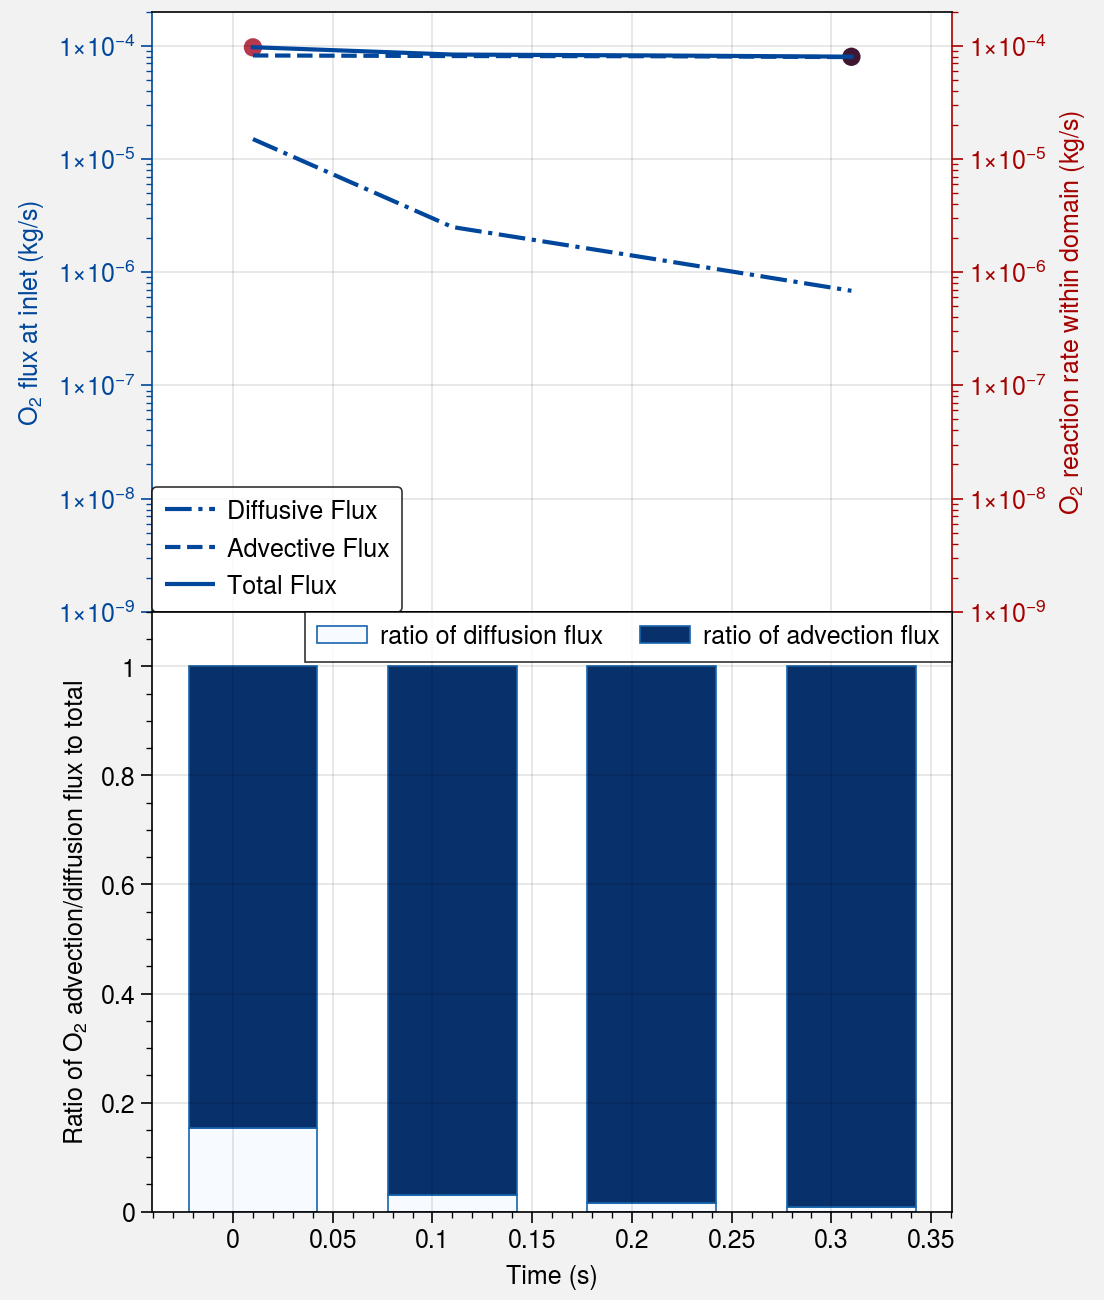

In [21]:
ax,ax2,fig=pyFigure.plot_O2_flux_reaction_rate(df_O2_flux_at_inlet,df_rate,pixelResolution,DO2,sampling_rate=1,ylim=(1e-9,2e-4))


In [21]:
fig.savefig("O2Flux_ReactionRate.jpg",bbox_inches='tight')

## Show the max temperature and O2 concentration at the outlet

In [22]:
df_combined=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(file_path,transverse_data_folder)

(-2.0, 32.0)

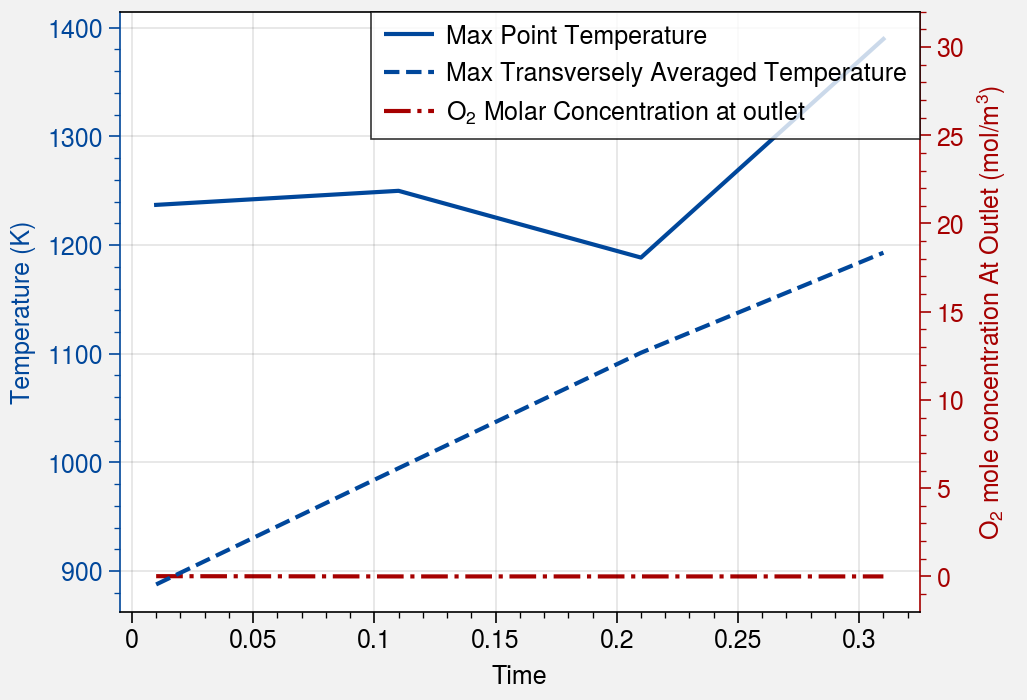

In [23]:
ax1,ax2,fig=pyFigure.Plot_MaxTemperature_OutletO2ConcHistory(df_combined)
ax2.set_ylim([-2,32])

In [24]:
fig.savefig("MaxTemperature_OutletO2ConcHistory.jpg",bbox_inches='tight')